# Blood Cells Cancer (Acute Lymphoblastic Leukemia) Detection with Pretrained Models using Attention Mechanism

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import cv2
import time
import shutil
import pathlib
import itertools
import tensorflow as tf

In [2]:
from PIL import Image
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNet

In [3]:
import os
for dirname, _, filenames in os.walk('Blood cell Cancer [ALL]'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Blood cell Cancer [ALL]\Benign\Sap_013 (1).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (10).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (11).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (12).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (13).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (14).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (15).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (16).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (17).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (18).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (19).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (2).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (20).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (21).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (23).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (24).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (25).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (26).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (27).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (28).jpg
Blood cell Cancer [ALL]\Benign\Sap_013 (29

In [4]:
base_dir = 'Blood cell Cancer [ALL]'

In [5]:
categories = {
    'Benign': 'Benign',
    'Malignant_Pre_B': '[Malignant] Pre-B',
    'Malignant_Pro_B': '[Malignant] Pro-B',
    'Malignant_early_Pre_B': '[Malignant] early Pre-B'
}

file_paths = []
labels = []

for label, subfolder in categories.items():
    folder_path = os.path.join(base_dir, subfolder)
    for filename in os.listdir(folder_path):
        file_paths.append(os.path.join(folder_path, filename))
        labels.append(label)

df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})

In [6]:
df.head()

,file_path,label
0,Blood cell Cancer [ALL]\Benign\Sap_013 (1).jpg,Benign
1,Blood cell Cancer [ALL]\Benign\Sap_013 (10).jpg,Benign
2,Blood cell Cancer [ALL]\Benign\Sap_013 (11).jpg,Benign
3,Blood cell Cancer [ALL]\Benign\Sap_013 (12).jpg,Benign
4,Blood cell Cancer [ALL]\Benign\Sap_013 (13).jpg,Benign


In [7]:
df.tail()

,file_path,label
3237,Blood cell Cancer [ALL]\[Malignant] early Pre-...,Malignant_early_Pre_B
3238,Blood cell Cancer [ALL]\[Malignant] early Pre-...,Malignant_early_Pre_B
3239,Blood cell Cancer [ALL]\[Malignant] early Pre-...,Malignant_early_Pre_B
3240,Blood cell Cancer [ALL]\[Malignant] early Pre-...,Malignant_early_Pre_B
3241,Blood cell Cancer [ALL]\[Malignant] early Pre-...,Malignant_early_Pre_B


In [8]:
df.shape

(3242, 2)

In [9]:
df.columns

Index(['file_path', 'label'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

file_path    0
label        0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_14468\2709100003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='viridis')


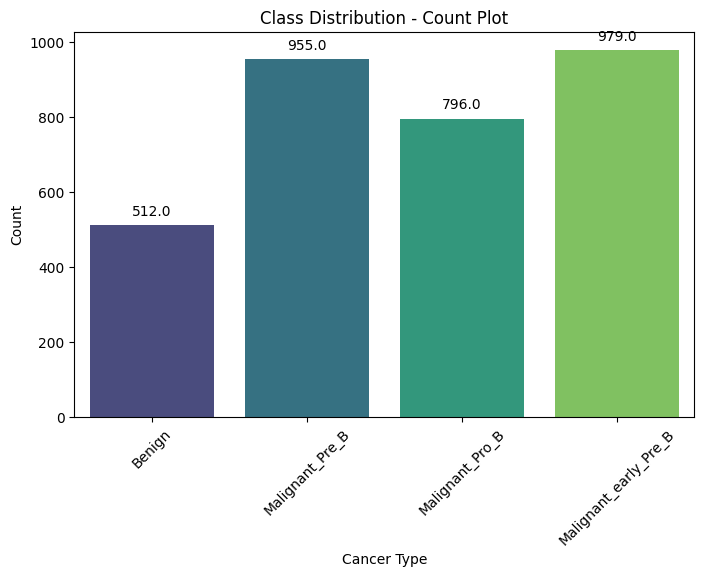

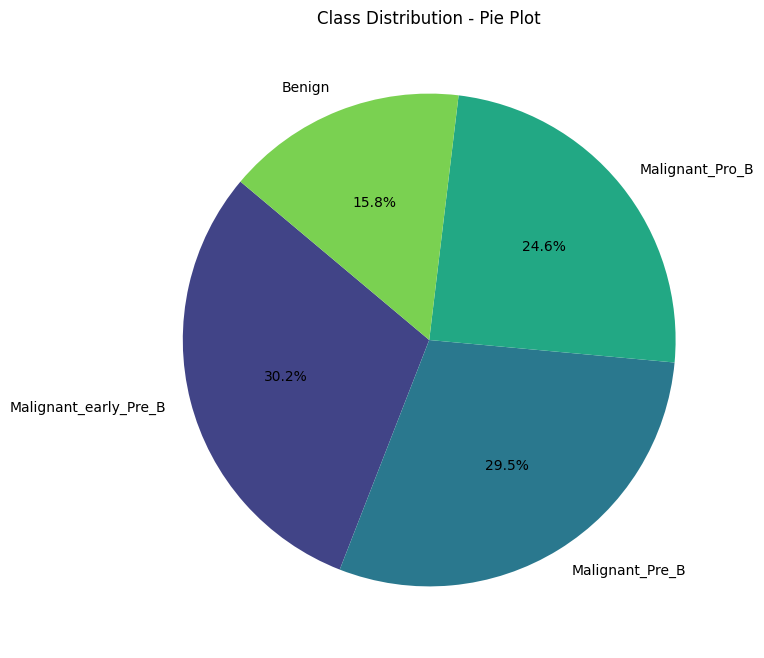

In [12]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='label', data=df, palette='viridis')
plt.title('Class Distribution - Count Plot')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

plt.figure(figsize=(8, 8))
labels = df['label'].value_counts().index  
sizes = df['label'].value_counts().values  
colors = sns.color_palette('viridis', len(labels))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution - Pie Plot')
plt.show()

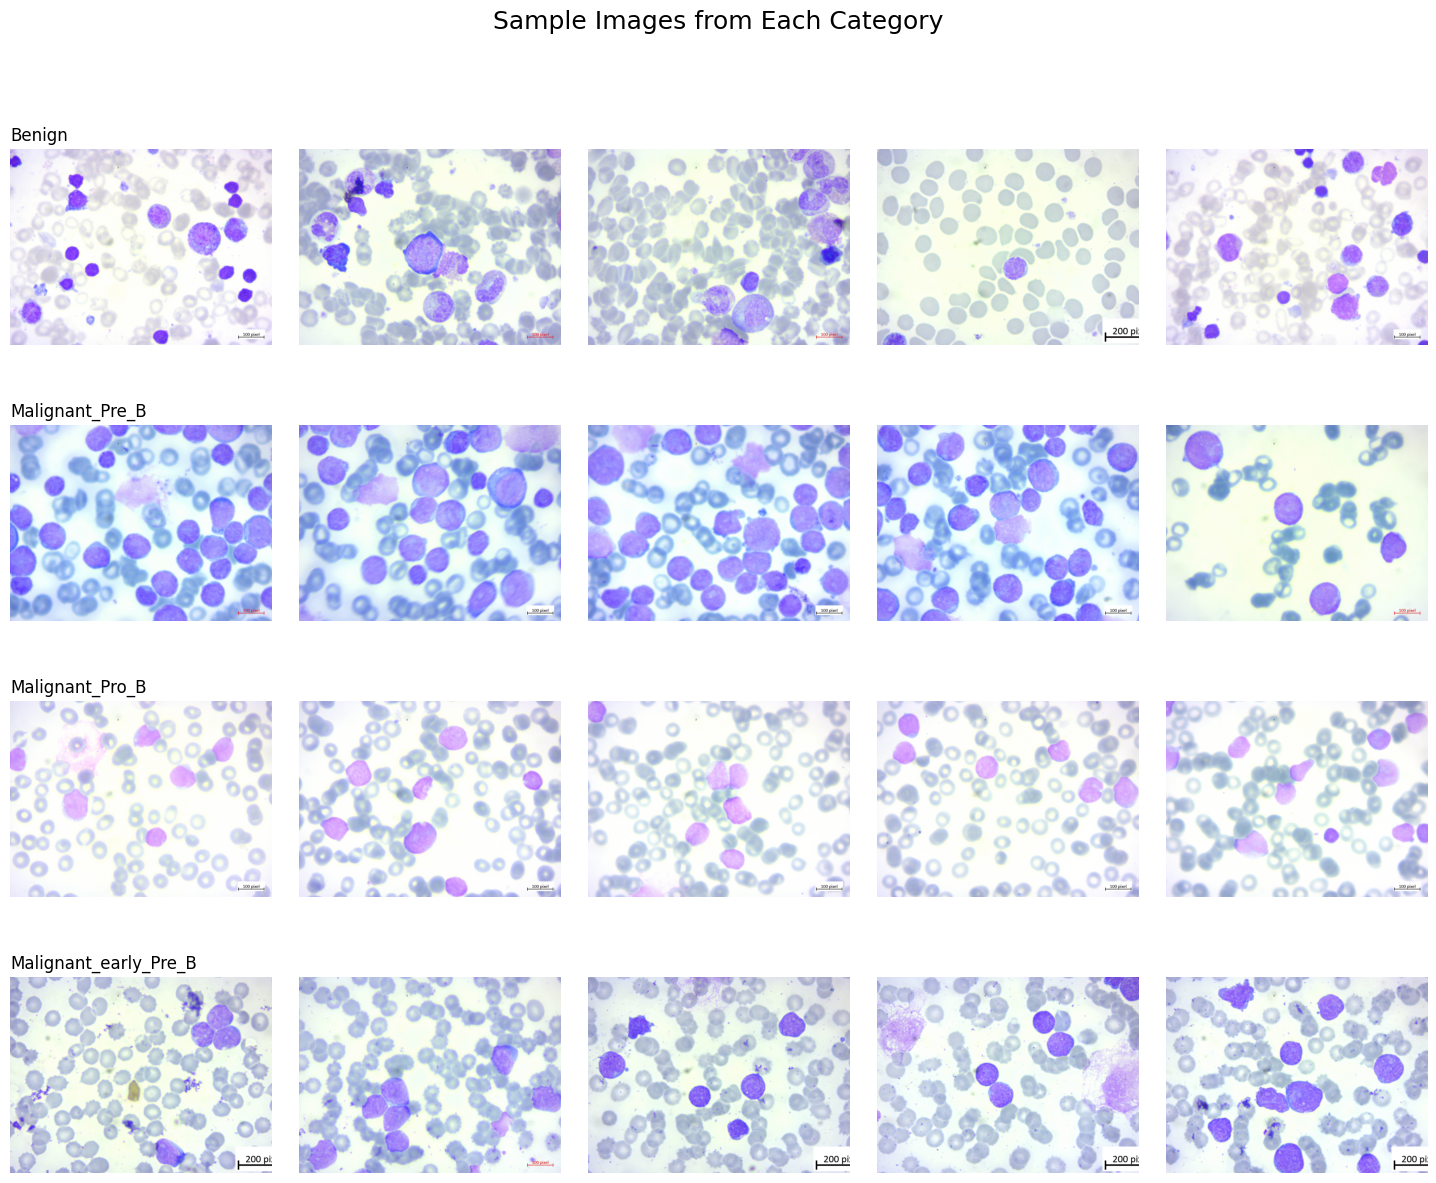

In [13]:
num_images = 5

fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 12))
fig.suptitle('Sample Images from Each Category', fontsize=18, y=1.02, ha='center') 

for i, (label, subfolder) in enumerate(categories.items()):
    category_images = df[df['label'] == label]['file_path'].tolist()
    selected_images = random.sample(category_images, num_images)
    
    for j, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')  
        
        if j == 0:
            axes[i, j].set_title(label, fontsize=12, loc='left')

plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=5.0)
plt.subplots_adjust(top=0.92)
plt.show()

In [14]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['file_path']], df['label'])

In [15]:
df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
df_resampled['label'] = y_resampled

In [16]:
print("\nClass distribution after oversampling => ")
print(df_resampled['label'].value_counts())


Class distribution after oversampling => 
label
Benign                   979
Malignant_Pre_B          979
Malignant_Pro_B          979
Malignant_early_Pre_B    979
Name: count, dtype: int64


In [17]:
df_resampled

,file_path,label
0,Blood cell Cancer [ALL]\Benign\Sap_013 (1).jpg,Benign
1,Blood cell Cancer [ALL]\Benign\Sap_013 (10).jpg,Benign
2,Blood cell Cancer [ALL]\Benign\Sap_013 (11).jpg,Benign
3,Blood cell Cancer [ALL]\Benign\Sap_013 (12).jpg,Benign
4,Blood cell Cancer [ALL]\Benign\Sap_013 (13).jpg,Benign
...,...,...
3911,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B
3912,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B
3913,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B
3914,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B


In [18]:
le = LabelEncoder()

df_resampled['label_encoded'] = le.fit_transform(df_resampled['label'])

In [19]:
df_resampled

,file_path,label,label_encoded
0,Blood cell Cancer [ALL]\Benign\Sap_013 (1).jpg,Benign,0
1,Blood cell Cancer [ALL]\Benign\Sap_013 (10).jpg,Benign,0
2,Blood cell Cancer [ALL]\Benign\Sap_013 (11).jpg,Benign,0
3,Blood cell Cancer [ALL]\Benign\Sap_013 (12).jpg,Benign,0
4,Blood cell Cancer [ALL]\Benign\Sap_013 (13).jpg,Benign,0
...,...,...,...
3911,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B,2
3912,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B,2
3913,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B,2
3914,Blood cell Cancer [ALL]\[Malignant] Pro-B\Snap...,Malignant_Pro_B,2


In [20]:
df_resampled['label_encoded'].unique()

array([0, 1, 2, 3])

In [21]:
df_resampled['label_encoded'].value_counts()

label_encoded
0    979
1    979
2    979
3    979
Name: count, dtype: int64

In [22]:
df_resampled = df_resampled[['file_path', 'label_encoded']]

In [23]:
sns.set_style('darkgrid')

In [24]:
import warnings
warnings.filterwarnings("ignore")

print ('Check..........')

Check..........


In [25]:
df_resampled['label_encoded'] = df_resampled['label_encoded'].astype(str)

In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label_encoded'] 
)

In [27]:
batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',  
    y_col='label_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',  
    y_col='label_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path', 
    y_col='label_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 3132 validated image filenames belonging to 4 classes.
Found 392 validated image filenames belonging to 4 classes.
Found 392 validated image filenames belonging to 4 classes.


In [28]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
def create_inceptionv3_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x)  

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inceptionv3_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [31]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 1149s 5s/step - accuracy: 0.7999 - loss: 0.5828 - val_accuracy: 0.6658 - val_loss: 1.6733
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 916s 5s/step - accuracy: 0.9247 - loss: 0.2394 - val_accuracy: 0.9541 - val_loss: 0.1400
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 22530s 115s/step - accuracy: 0.9557 - loss: 0.1314 - val_accuracy: 0.5740 - val_loss: 1.7085
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.9641 - loss: 0.1011 - val_accuracy: 0.9515 - val_loss: 0.1396
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 0.9873 - loss: 0.0505 - val_accuracy: 0.9872 - val_loss: 0.0420


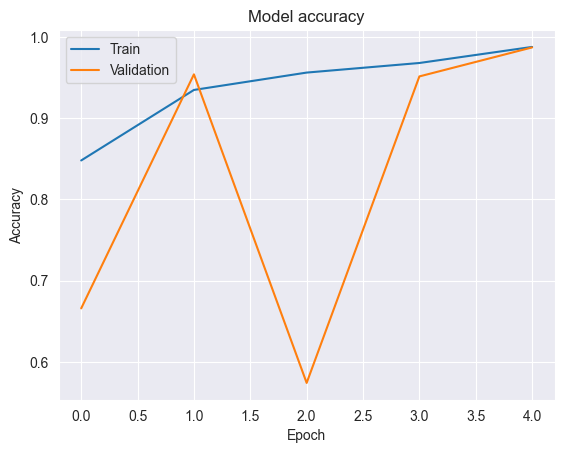

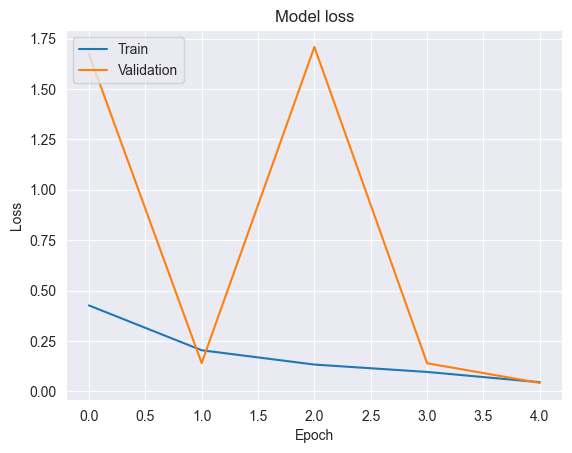

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 961ms/step


In [34]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        98
           1       0.99      0.99      0.99        98
           2       0.97      1.00      0.98        98
           3       0.99      0.90      0.94        98

    accuracy                           0.97       392
   macro avg       0.97      0.97      0.97       392
weighted avg       0.97      0.97      0.97       392



In [35]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

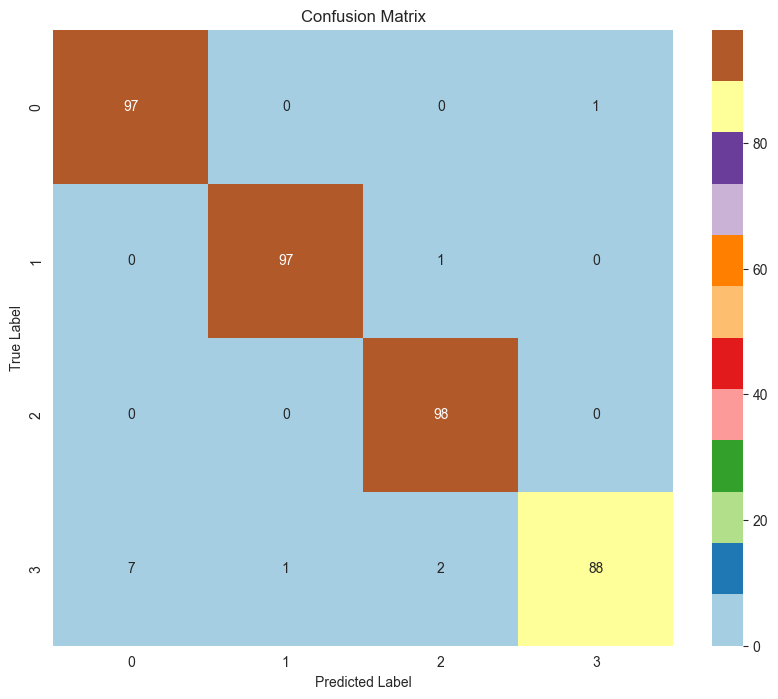

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Paired', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 1183s 6s/step - accuracy: 0.8426 - loss: 0.4408 - val_accuracy: 0.8903 - val_loss: 0.3002
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step - accuracy: 0.9483 - loss: 0.1363 - val_accuracy: 0.9745 - val_loss: 0.0743
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 655s 3s/step - accuracy: 0.9717 - loss: 0.0852 - val_accuracy: 0.9158 - val_loss: 0.2335
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.9790 - loss: 0.0643 - val_accuracy: 0.8316 - val_loss: 0.4918
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 639s 3s/step - accuracy: 0.9802 - loss: 0.0577 - val_accuracy: 0.9668 - val_loss: 0.0857


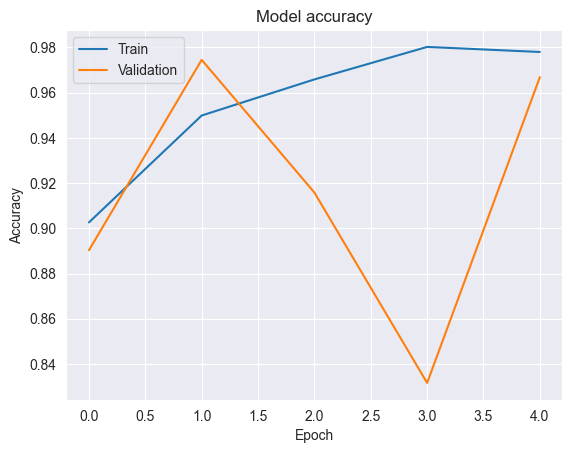

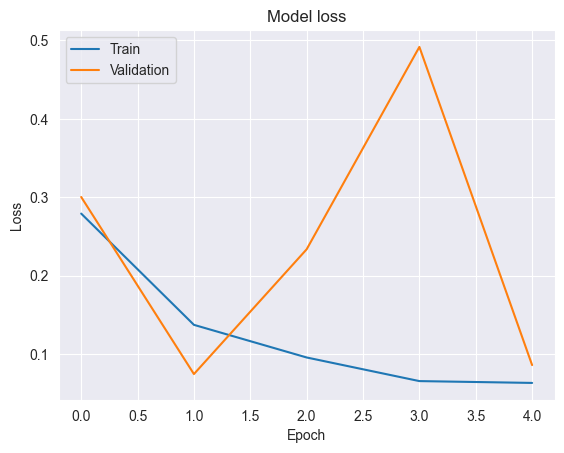

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


In [41]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        98
           1       0.85      0.99      0.92        98
           2       0.91      1.00      0.95        98
           3       1.00      0.71      0.83        98

    accuracy                           0.92       392
   macro avg       0.92      0.92      0.91       392
weighted avg       0.92      0.92      0.91       392



In [42]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

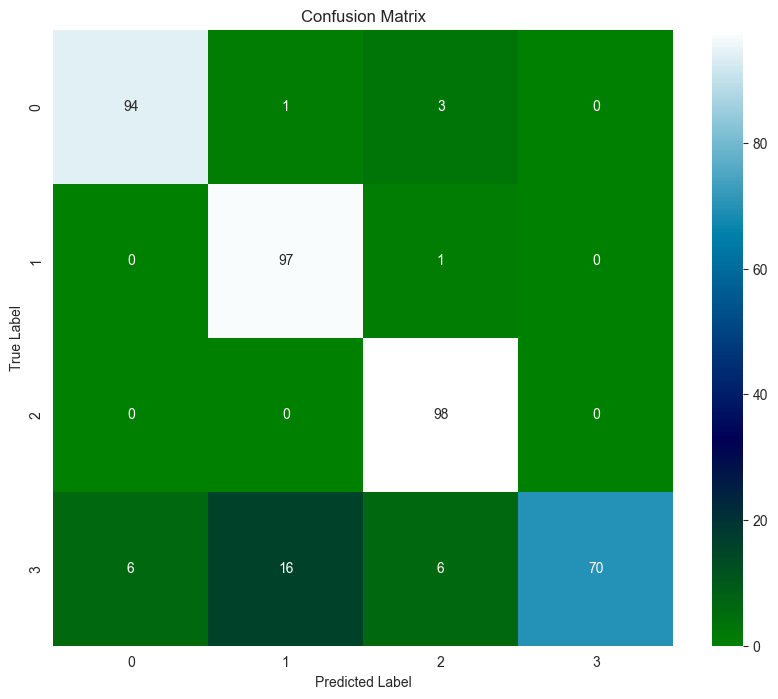

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='ocean', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)
    
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)  

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [45]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 166s 817ms/step - accuracy: 0.8765 - loss: 0.3588 - val_accuracy: 0.9056 - val_loss: 0.2686
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2701s 14s/step - accuracy: 0.9654 - loss: 0.1057 - val_accuracy: 0.9745 - val_loss: 0.0705
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 166s 848ms/step - accuracy: 0.9783 - loss: 0.0692 - val_accuracy: 0.9770 - val_loss: 0.0755
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 167s 850ms/step - accuracy: 0.9820 - loss: 0.0544 - val_accuracy: 0.9847 - val_loss: 0.0440
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 157s 800ms/step - accuracy: 0.9940 - loss: 0.0258 - val_accuracy: 0.9847 - val_loss: 0.0314


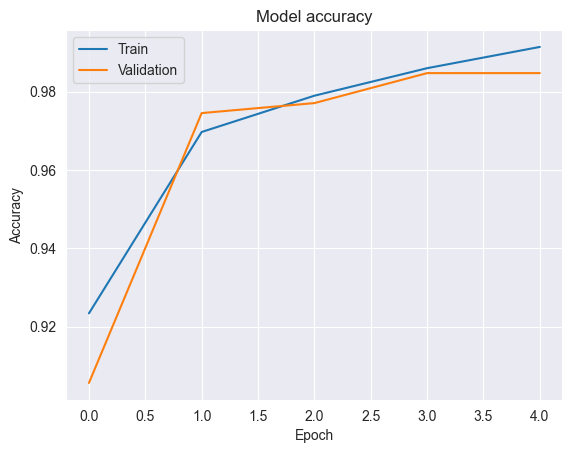

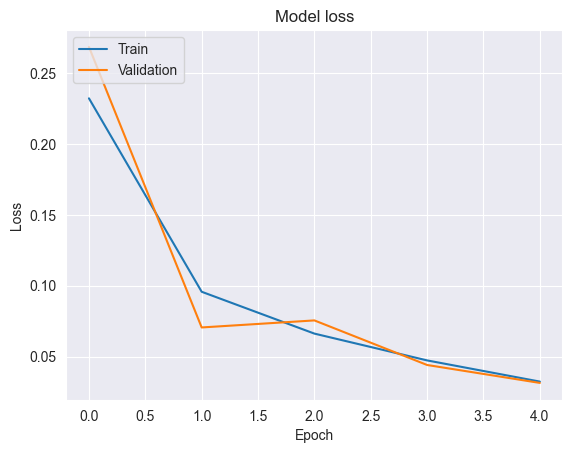

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 424ms/step


In [48]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.96      0.99      0.97        98
           2       0.99      0.99      0.99        98
           3       0.99      0.96      0.97        98

    accuracy                           0.98       392
   macro avg       0.98      0.98      0.98       392
weighted avg       0.98      0.98      0.98       392



In [49]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

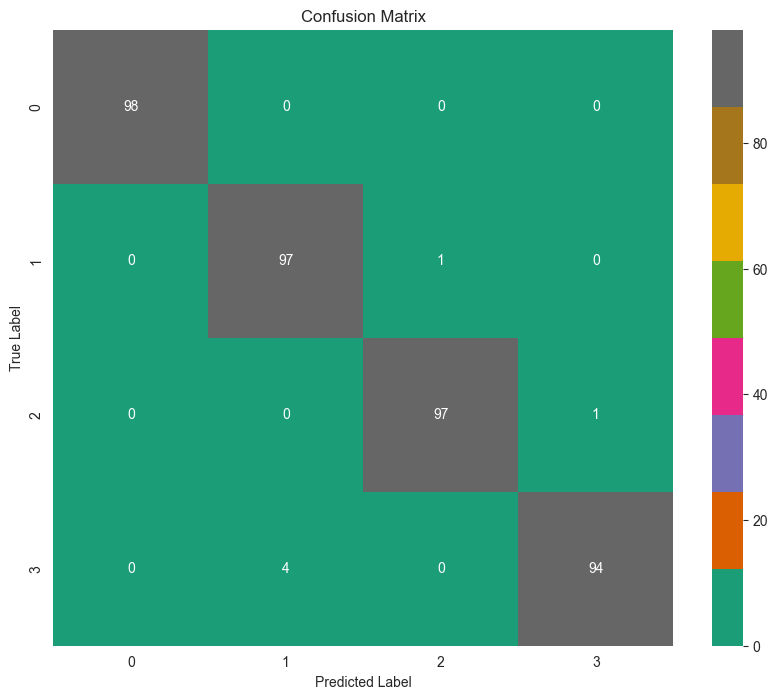

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Dark2', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

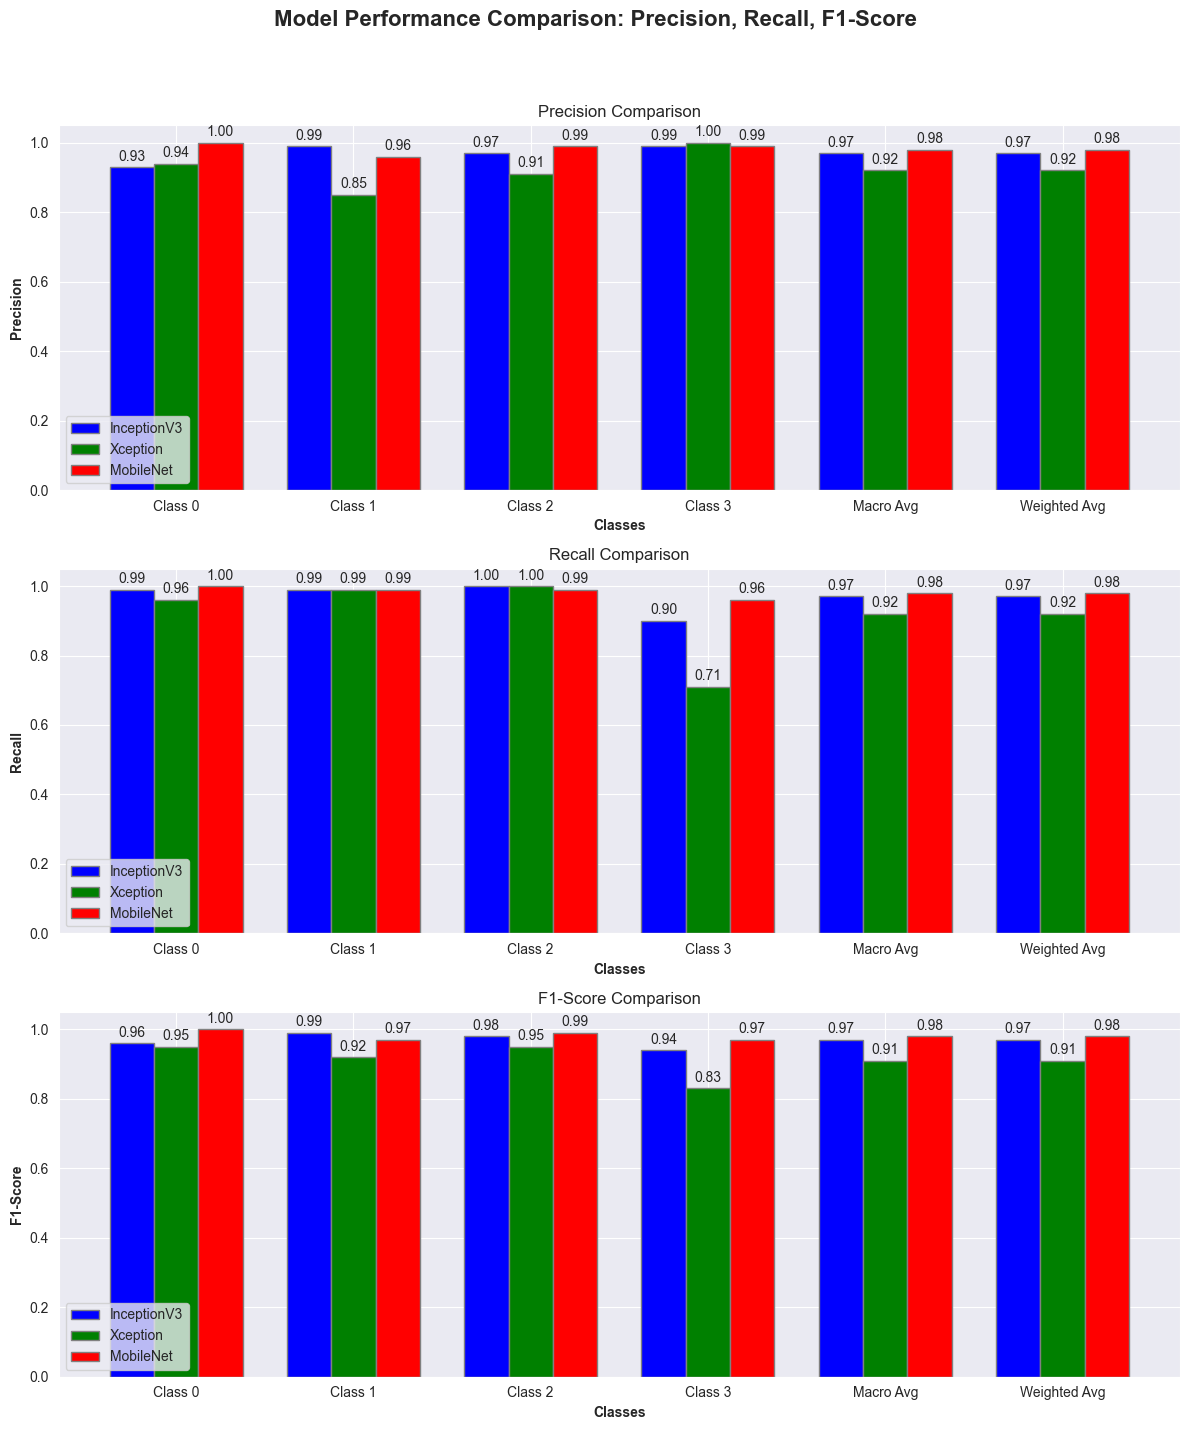

In [52]:
metrics = ['Precision', 'Recall', 'F1-Score']
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Macro Avg', 'Weighted Avg']
inception_scores = [
    [0.93, 0.99, 0.97, 0.99, 0.97, 0.97], 
    [0.99, 0.99, 1.00, 0.90, 0.97, 0.97],  
    [0.96, 0.99, 0.98, 0.94, 0.97, 0.97]  
]
xception_scores = [
    [0.94, 0.85, 0.91, 1.00, 0.92, 0.92],  
    [0.96, 0.99, 1.00, 0.71, 0.92, 0.92],  
    [0.95, 0.92, 0.95, 0.83, 0.91, 0.91] 
]
mobilenet_scores = [
    [1.00, 0.96, 0.99, 0.99, 0.98, 0.98], 
    [1.00, 0.99, 0.99, 0.96, 0.98, 0.98],  
    [1.00, 0.97, 0.99, 0.97, 0.98, 0.98]   
]

bar_width = 0.25
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle("Model Performance Comparison: Precision, Recall, F1-Score", fontsize=16, fontweight='bold')

for i, metric in enumerate(metrics):
    ax[i].bar(r1, inception_scores[i], color='b', width=bar_width, edgecolor='grey', label='InceptionV3')
    ax[i].bar(r2, xception_scores[i], color='g', width=bar_width, edgecolor='grey', label='Xception')
    ax[i].bar(r3, mobilenet_scores[i], color='r', width=bar_width, edgecolor='grey', label='MobileNet')
    
    ax[i].set_xlabel('Classes', fontweight='bold')
    ax[i].set_ylabel(metric, fontweight='bold')
    ax[i].set_title(f'{metric} Comparison')
    ax[i].set_xticks([r + bar_width for r in range(len(classes))])
    ax[i].set_xticklabels(classes)
    ax[i].legend()
    
    for bar_container, score_set in zip([r1, r2, r3], [inception_scores[i], xception_scores[i], mobilenet_scores[i]]):
        for bar, score in zip(bar_container, score_set):
            ax[i].text(bar, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()